In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

import pandas as pd
import re
import warnings
warnings.simplefilter('ignore')

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/My Drive/DataSet/Tweets_Mg.csv')

In [ ]:
df

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8194,8194,Thu Feb 09 11:48:07 +0000 2017,"Trio é preso suspeito de roubo, tráfico e abus...",NaN,NaN,NaN,Ana Lúcia,lapiseirapentel,0,Positivo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8195,8195,Thu Feb 09 12:10:19 +0000 2017,"Trio é preso suspeito de roubo, tráfico e abus...",NaN,NaN,Belo Horizonte - Minas Gerais,Marcelo Rezende,Televans,0,Positivo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8196,8196,Thu Feb 09 12:04:17 +0000 2017,"Trio é preso suspeito de roubo, tráfico e abus...",NaN,NaN,Guarulhos - SP,Leonardo Nascimento,leonardogru,0,Positivo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8197,8197,Thu Feb 09 12:10:04 +0000 2017,"Trio é preso suspeito de roubo, tráfico e abus...",NaN,NaN,Brasil Natal/RN,Lucas Medeiros �©™,parabolicalucas,0,Positivo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

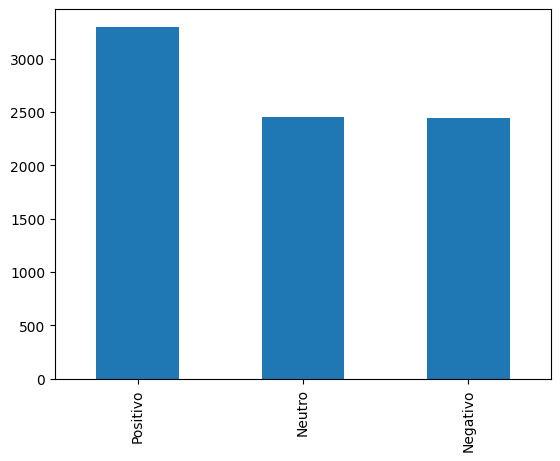

In [ ]:
df['Classificacao'].value_counts().plot.bar()

In [ ]:
df.drop_duplicates(['Text'], inplace=True)

In [ ]:
df=df.reset_index()

In [ ]:
tweets= df['Text']
classes= df['Classificacao']

In [ ]:
import nltk

nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def RemoveStopWords(instancia):
  stopwords= set(nltk.corpus.stopwords.words('portuguese'))
  palavras= [i for i in intancia.split() if not i in stopwords]
  return(' '.join(palavras))

In [ ]:
def Stemming(instancia):
  stemmer= nltk.stem.RSLPStemmer()
  palavras= []
  for i in instancia.split():
    palavras.append(stemmer.stem(w))

  return ' '.join(palavras)

**Aplica as 3 funções de Pre-processamento nos dados**

In [ ]:
def Preprocessing(instancia):
    stemmer = nltk.stem.RSLPStemmer()  #1
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','') #2
    stopwords = set(nltk.corpus.stopwords.words('portuguese')) #3
    palavras = [stemmer.stem(i) for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

# Aplica a função em todos os dados:
tweets = [Preprocessing(i) for i in tweets]

In [ ]:
from nltk.tokenize import TweetTokenizer

tweet_tokenizer = TweetTokenizer()



#Criando o Modelo

In [ ]:
vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)

# vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize, max_features=1000)   <-- bases muito grandes

In [ ]:
freq_tweets = vectorizer.fit_transform(tweets)

In [ ]:
modelo = MultinomialNB() #naivebayes
modelo.fit(freq_tweets,classes)

MultinomialNB()

In [ ]:
freq_tweets.A

array([[0, 0, 0, ..., 0, 0, 3],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 2],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# defina instâncias de teste dentro de uma lista
testes = ['Esse governo está no início, vamos ver o que vai dar',
          'Estou muito feliz com o governo de Minas esse ano',
          'O estado de Minas Gerais decretou calamidade financeira!!!',
          'A segurança desse país está deixando a desejar',
          'O governador de Minas é mais uma vez do PT']

In [ ]:
testes_preprocessados = list(map(Preprocessing, testes))


In [ ]:
# Transforma os dados de teste em vetores de palavras.
freq_testes = vectorizer.transform(testes)

In [ ]:
for t, c in zip (testes,modelo.predict(freq_testes)):
    print (t +", "+ c)

Esse governo está no início, vamos ver o que vai dar, Neutro
Estou muito feliz com o governo de Minas esse ano, Neutro
O estado de Minas Gerais decretou calamidade financeira!!!, Negativo
A segurança desse país está deixando a desejar, Neutro
O governador de Minas é mais uma vez do PT, Neutro


In [ ]:
print(modelo.classes_)

modelo.predict_proba(freq_testes).round(2)

['Negativo' 'Neutro' 'Positivo']


array([[0.38, 0.62, 0.  ],
       [0.01, 0.99, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.11, 0.89, 0.  ],
       [0.3 , 0.7 , 0.  ]])

## **Tags de Negações**

* Acrescenta uma tag _NEG encontrada após um 'não'.
* Objetivo é dar mais peso para o modelo identificar uma inversão de sentimento da frase.
* Exemplos:
    - Eu gosto de cachorros, positivo.
    - Eu **não** gosto de cachorros, negativo.

In [ ]:
def marque_negacao(texto):
    negacoes = ['não','not']
    negacao_detectada = False
    resultado = []
    palavras = texto.split()
    for p in palavras:
        p = p.lower()
        if negacao_detectada == True:
            p = p + '_NEG'
        if p in negacoes:
            negacao_detectada = True
        resultado.append(p)
    return (" ".join(resultado))

In [ ]:
marque_negacao('Eu gosto do partido, votaria novamente nesse governante!')

'eu gosto do partido, votaria novamente nesse governante!'

In [ ]:
marque_negacao('Eu Não gosto do partido e também não votaria novamente nesse governante!')

'eu não gosto_NEG do_NEG partido_NEG e_NEG também_NEG não_NEG votaria_NEG novamente_NEG nesse_NEG governante!_NEG'

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline= Pipeline([('Counts', CountVectorizer()),
                    ('Classifier', MultinomialNB() )])

In [ ]:
pipeline_negacoes = Pipeline([
  ('counts', CountVectorizer(tokenizer=lambda text: marque_negacao(text))),
  ('classifier', MultinomialNB())
])

In [ ]:
pipeline.fit(tweets, classes)

Pipeline(steps=[('Counts', CountVectorizer()), ('Classifier', MultinomialNB())])

In [ ]:
pipeline.steps

[('Counts', CountVectorizer()), ('Classifier', MultinomialNB())]

In [ ]:
pipeline_negacoes.fit(tweets, classes)

Pipeline(steps=[('counts',
                 CountVectorizer(tokenizer=<function <lambda> at 0x7f224dacd0d0>)),
                ('classifier', MultinomialNB())])

In [ ]:
pipeline_negacoes.steps

[('counts', CountVectorizer(tokenizer=<function <lambda> at 0x7f224dacd0d0>)),
 ('classifier', MultinomialNB())]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
randomforest= RandomForestClassifier()


pipeline_randomforest= Pipeline([('Counts', CountVectorizer()),
                    ('Classifier', randomforest )])

In [ ]:
def Accuracy(modelo, tweets, classes):
  resultados = cross_val_predict(modelo, tweets, classes, cv=10)
  return 'Acurácia do modelo: {}'.format(metrics.accuracy_score(classes,resultados))

In [ ]:
Accuracy(pipeline_randomforest, tweets, classes)

'Acurácia do modelo: 0.8829141370338248'

In [ ]:
def ClassificationReport(modelo, tweets, classes):
  resultados = cross_val_predict(modelo, tweets, classes, cv=10)
  sentimento=['Positivo','Negativo','Neutro']
  cr= metrics.classification_report(classes,resultados)
  return print(cr)

In [ ]:
ClassificationReport(pipeline_randomforest, tweets, classes)

              precision    recall  f1-score   support

    Negativo       0.91      0.84      0.88       951
      Neutro       0.76      0.94      0.84      1974
    Positivo       0.97      0.84      0.90      2840

    accuracy                           0.87      5765
   macro avg       0.88      0.87      0.87      5765
weighted avg       0.89      0.87      0.88      5765



## **Avaliando modelo com Bigrams**

Eu gosto do Brasil -------------> **'eu gosto', 'gosto do' , 'do brasil'**

In [ ]:
# Bigrams
vectorizer = CountVectorizer(ngram_range=(2,2))
freq_tweets = vectorizer.fit_transform(tweets)
modelo = MultinomialNB()
modelo.fit(freq_tweets,classes)

MultinomialNB()

In [ ]:
resultados = cross_val_predict(modelo, freq_tweets, classes, cv=10)

In [ ]:
metrics.accuracy_score(classes,resultados)

0.8225498699045967